# Streamlit – Project

## I. Lý thuyết
Xây dựng và phát triển các ứng dụng AI bao gồm các bước sau:

- **Data Handling**: bao gồm các bước về thu thập và xử lý dữ liệu
- **Exploratory Data Analysis (EDA)**: phân tích các đặc trưng của dữ liệu
- **Modeling**: từ các đặc trưng, xây dựng các mô hình và đánh giá tính hiệu quả của mô hình
- **Deployment**: triển khai mô hình thành sản phẩm trên các nên tảng khác nhau như website, app,...

Trong phần này, chúng ta sẽ tập trung tìm hiểu thư viện Streamlit, một trong những thư viện mã nguồn mở được phát triển và ứng dụng rộng rãi để triển khai các ứng dụng AI nói chung. Streamlit cung cấp các công cụ hiệu quả để tương tác với người dùng để nhập thông tin hoặc hiển thị thông tin.

Trong các phần tiếp theo, chúng ta tập trung vào phát triển các ứng dụng cơ bản sau:

- **Word Correction**
- **Object Detection**
- **Chatbot**

### 1. Word Correction
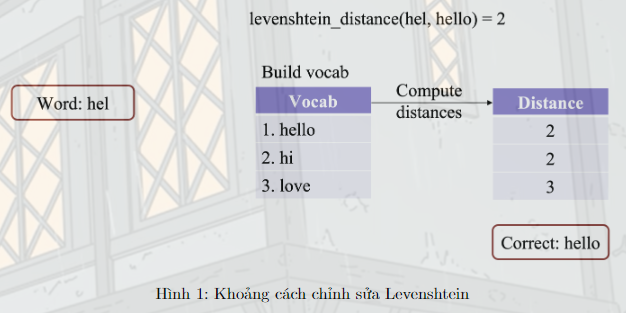

Word Correction (Sửa lỗi chính tả) là một trong những ứng dụng cơ bản của xử lý ngôn ngữ tự nhiên, với mục đích xây dựng các ứng dụng nhận đầu vào là một từ, thông qua mô hình sửa lỗi nếu từ đó bị sai thành một từ đúng.

*Ví dụ*: người dùng nhập vào từ ’hel’ là một từ sai, mô hình sẽ gợi ý sửa lỗi thành từ ’hello’. Để đơn giản trong phần này, chúng ta sẽ sử dụng độ đo khoảng cách chỉnh sửa tối thiểu giữa hai từ, là độ đo levenshtein. Được minh hoạ như hình trên.

Để giải quyết bài toán này, chúng ta thực hiện các bước sau để xây dựng thuật toán:

- Đầu tiên chúng ta sẽ xây dựng bộ từ điển (gọi là dictionary hoặc vocabulary). Một số từ vựng được chuẩn bị sẵn trong file vocab.txt có thể được tải về **[tại đây](https://drive.google.com/file/d/1h61ZdkuX0i2Z70tkGx3UyTMXsl4EELw5/view "vocabulary").**

In [2]:
def load_vocab(file_path):
    with open(file_path , 'r') as f:
        lines = f.readlines ()
    words = sorted(set([line.strip ().lower() for line in lines]))
    return words
vocabs = load_vocab(file_path='source/data/vocab.txt')
vocabs

['apple',
 'book',
 'dog',
 'hello',
 'never',
 'please',
 'random',
 'sleep',
 'start',
 'understand']

- Tương ứng với mỗi từ trong từ điển, chúng ta tính khoảng cách levenshtein với từ đã có được nhập vào bởi người dùng.

In [21]:
def levenshtein_distance(token1, token2):
    distances = [[0]*(len(token2)+1) for _ in range(len(token1)+1)]

    # for t1 in range(len(token1) + 1):
    #     distances[t1][0] = t1

    # for t2 in range(len(token2) + 1):
    #     distances[0][t2] = t2

    a, b, c = 0, 0, 0

    for t1 in range(1, len(token1) + 1):
        distances[t1][0] = t1
        for t2 in range(1, len(token2) + 1):
            distances[0][t2] = t2
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]

                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    return distances[len(token1)][len(token2)]

In [22]:
list_leven = {}
for w in vocabs:
    dis_min = len(w)
    for t in vocabs:
        dis = levenshtein_distance(w, t)
        if (w != t) and (dis_min >= dis):
            dis_min = dis
            list_leven[w] = t
list_leven

{'apple': 'hello',
 'book': 'dog',
 'dog': 'book',
 'hello': 'never',
 'never': 'sleep',
 'please': 'sleep',
 'random': 'dog',
 'sleep': 'start',
 'start': 'sleep',
 'understand': 'start'}

In [4]:
list_leven = {}
for w in vocabs:
    dis_min = len(w)
    for t in vocabs:
        dis = levenshtein_distance(w, t)
        if (w != t) and (dis_min >= dis):
            dis_min = dis
            list_leven[w] = t
list_leven

{'apple': 'hello',
 'book': 'dog',
 'dog': 'book',
 'hello': 'never',
 'never': 'sleep',
 'please': 'sleep',
 'random': 'dog',
 'sleep': 'start',
 'start': 'sleep',
 'understand': 'start'}

- So sánh và chọn từ có khoảng cách chỉnh sửa bé nhất.

Tiếp theo, chúng ta sẽ xây dựng giao diện bằng thư viện streamlit. Giao diện của ứng dụng được mô tả như hình sau:

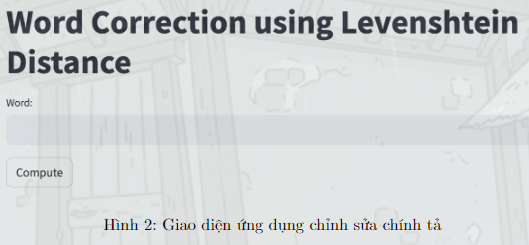

In [5]:
import streamlit as st

def main():
    st.title("Word Correction using Levenshtein Distance")
    word = st.text_input('Word:')

    if st.button("Compute"):

        # compute levenshtein distance
        leven_distances = dict()
        for vocab in vocabs:
            leven_distances[vocab] = levenshtein_distance(word , vocab)

        # sorted by distance
        sorted_distences = dict(sorted(leven_distances.items(), key=lambda item: item [1]))
        correct_word = list(sorted_distences.keys())[0]
        st.write('Correct word: ', correct_word)

        col1 , col2 = st.columns (2)
        col1.write('Vocabulary: ')
        col1.write(vocabs)

        col2.write('Distances: ')
        col2.write(sorted_distences)

if __name__ == "__main__":
    main()

2024-06-26 14:06:48.205 
  command:

    streamlit run c:\Users\xps15\anaconda3\envs\py\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-06-26 14:06:48.206 Session state does not function when running a script without `streamlit run`


Cuối cùng, tất cả code sẽ được để trong file __levenshtein_distance.py__. Sau đó, chúng ta chạy lệnh __"streamlit run levelshtein_distance.py"__ và thực hiệm được kết quả như hình sau:

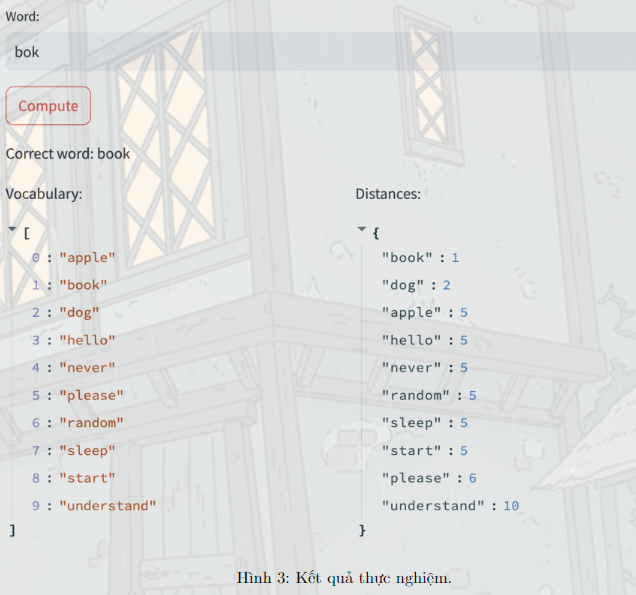

### 2. Object Detection
Object Detection là ứng dụng quan trọng điển hình của xử lý hình ảnh, với mục tiêu phát hiện các khung hình chứa các đối tượng trong ảnh. Ví dụ minh hoạ về ứng dụng như hình sau:

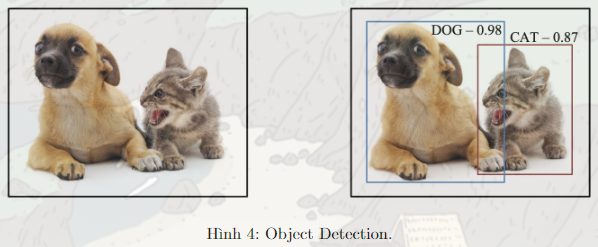

Trong phần này chúng ta sẽ xây dựng ứng dụng cho người dùng tải lên ảnh đầu vào, sử dụng mô hình DNN từ thư viện opencv (Vì phần project này tập trung vào thư viện streamlit vì vậy nên chúng ta sẽ không đi sâu vào mô hình DNN của thư viện opencv). 

Chúng ta xây dựng 2 hàm: 
- 1 hàm để đẩy ảnh đầu vào vào mô hình DNN để tìm được các bounding box phù hợp
- 1 hàm để lọc những bounding box có độ tin cậy thấp và trả về kết quả là các vị trí toạ độ của bounding box đó. 

Các cài đặt cho mô hình được thiết lập trong 2 file model và prototxt có thể được tải về **[tại đây](https://drive.google.com/file/d/1h61ZdkuX0i2Z70tkGx3UyTMXsl4EELw5/view "vocabulary").**

Mã nguồn ví dụ như sau:

In [6]:
import cv2
import numpy as np

MODEL = "model/MobileNetSSD_deploy.caffemodel"
PROTOTXT = "model/MobileNetSSD_deploy.prototxt.txt"

def process_image(image):
    blob = cv2.dnn.blobFromImage(cv2.resize(image , (300, 300)), 0.007843 , (300, 300), 127.5)
    net = cv2.dnn.readNetFromCaffe(PROTOTXT , MODEL)
    net.setInput(blob)
    detections = net.forward ()
    return detections

def annotate_image(image , detections , confidence_threshold =0.5):
    # loop over the detections
    (h, w) = image.shape[:2]
    for i in np.arange(0, detections.shape [2]):
        confidence = detections [0, 0, i, 2]

        if confidence > confidence_threshold:
            # extract the index of the class label from the ‘detections ‘,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections [0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array ([w, h, w, h])
            (startX , startY , endX , endY) = box.astype("int")
            cv2.rectangle(image , (startX , startY), (endX , endY), 70, 2)
    return image


Giao diện ứng dụng được mô tả như hình sau:
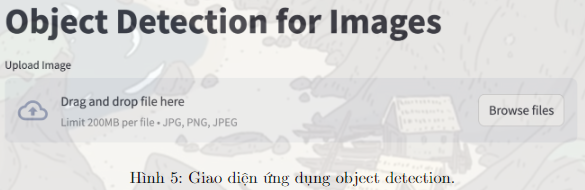

In [7]:

import numpy as np
from PIL import Image
import streamlit as st

def main():
    st.title('Object Detection for Images')
    file = st.file_uploader('Upload Image ', type = ['jpg','png','jpeg'])
    if file is not None:
        st.image(file , caption = "Uploaded Image")

        image = Image.open(file)
        image = np.array(image)
        detections = process_image(image)
        processed_image = annotate_image(image , detections)
        st.image(processed_image , caption = "Processed Image")

if __name__ == "__main__":
    main()

Sau đó, tất cả code sẽ được để trong file: __’object_detection.py’__. Cuối cùng chúng ta chạy lệnh __’streamlit run object_detection.py’__ để thử nghiệm và thu được kết quả như sau:
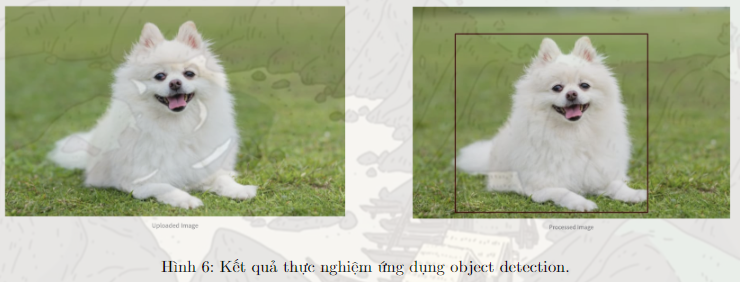

### 3. Chatbot
Chatbot là ứng dụng được chú ý phát triển mạnh những năm gần đây, các ứng dụng chatbot chủ yếu tập trung vào các mô hình ngôn ngữ lớn có thể tương tác tốt với các yêu cầu của người dùng.

Ví dụ về chatbot được mô tả trong hình sau:

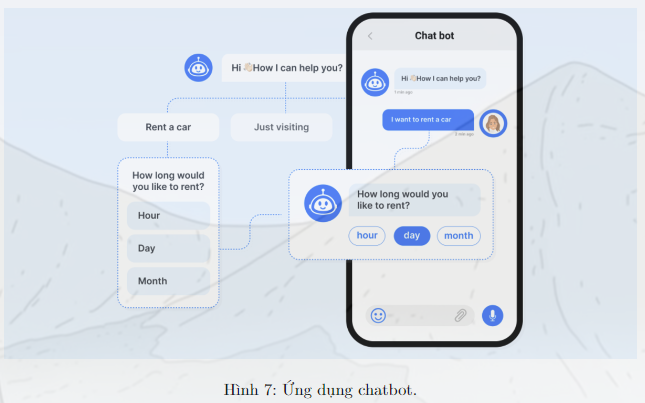

Trong phần này, chúng ta xây dựng ứng dụng chatbot đơn giản dựa trên thư viện __hugchat__ và __streamlit__. Đầu tiên chúng ta cần có tài khoảng **hugging face** để có quyền truy cập __hugchat__. Sau
đó truy cập vào **[trang](https://huggingface.co/chat/ "hugchat").** sau đây để gửi yêu cầu truy cập __hugchat__.

Sau khi được chấp nhận quyền truy cập, chúng ta xây dựng giao diện ứng dụng được mô tả như sau:

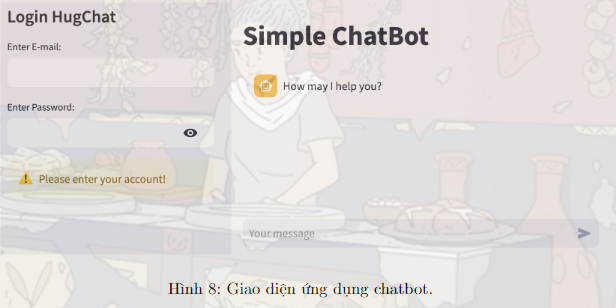

Giao diện có bố cục gồm 2 phần:


- **Phần bên trái**: Chứa thông tin nhập vào tài khoản và mật khẩu huggingface, được sử dụng để có quyền truy cập vào hugchat

In [8]:
import streamlit as st
from hugchat import hugchat
from hugchat.login import Login

# App title
st.title('Simple ChatBot ')

# Hugging Face Credentials
with st.sidebar:
    st.title('Login HugChat ')
    hf_email = st.text_input('Enter E-mail:')
    hf_pass = st.text_input('Enter Password:')#, type='password')
    if not (hf_email and hf_pass):
        st.warning('Please enter your account!')
    else:
        st.success('Proceed to entering your prompt message!')

- Phần bên phải (phần trung tâm): Chứa khu vực nhập vào văn bản và trả về phản hồi từ chatbot.

In [9]:
# Store LLM generated responses
if "messages" not in st.session_state.keys():
    st.session_state.messages = [{"role": "assistant", "content": "How may I help you?"}]

# Display chat messages
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.write(message["content"])

Tương ứng với mỗi request gửi đến chatbot, mô hình sẽ đăng nhập vào hugchat và đưa ra phản hồi tương ứng:

In [12]:
# Function for generating LLM response
def generate_response(prompt_input, email, passwd):
    # Hugging Face Login
    sign = Login(email, passwd)
    cookies = sign.login()
    # Create ChatBot
    chatbot = hugchat.ChatBot(cookies=cookies.get_dict())
    return chatbot.chat(prompt_input)

# User -provided prompt
if prompt := st.chat_input(disabled=not(hf_email and hf_pass)):
    st.session_state.messages.append({"role": "user", "content": prompt })
    with st.chat_message("user"):
        st.write(prompt)

# Generate a new response if last message is not from assistant
if st.session_state.messages [-1]["role"] != "assistant":
    with st.chat_message("assistant"):
        with st.spinner("Thinking ..."):
            response = generate_response(prompt , hf_email , hf_pass)
            st.write(response)

message = {"role": "assistant", "content": response}
st.session_state.messages.append(message)

Sau khi hoàn thiện code vào file __’chatbot.py’__, chúng ta chạy lệnh: __’streamlit run chatbot.py’__ và thử nghiệm thu được kết quả như sau:

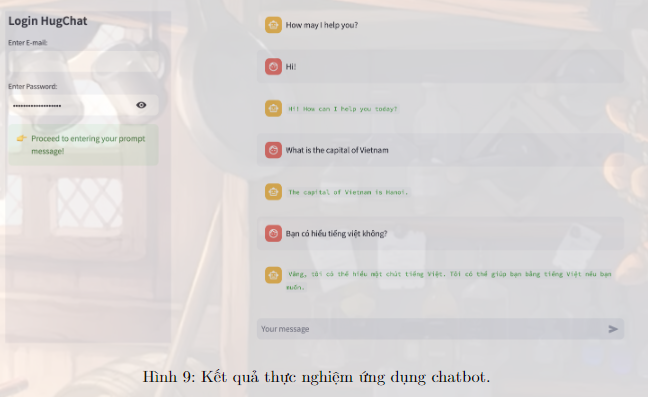

## II. Câu hỏi trắc nghiệm

### Câu hỏi 1: Hàm nào sau đây được sử dụng để hiển thị chuỗi văn bản trong streamlit.
__a) st.text(...)__

b) st.image(...)

c) st.selectbox(...)

d) st.slider(...)

### Câu hỏi 2: Đoạn code nào sau đây thể hiện đúng để hiển thị cho giao diện sau:
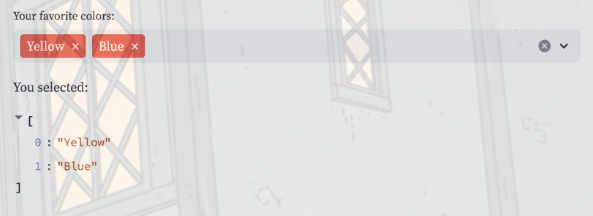

In [13]:
# a)
options = st.multiselect("Your favorite colors:")
st.write("You selected:", options)

# b)
options = st.multiselect("Your favorite colors:", ["Green", "Yellow", "Red", "Blue"], ["Yellow", "Red"])

## C) ##
options = st.multiselect("Your favorite colors:", ["Green", "Yellow", "Red", "Blue"], ["Yellow", "Red"])
st.write("You selected:", options)

# d)
options = st.selectbox("Your favorite colors:", ["Green", "Yellow", "Red", "Blue"], ["Yellow", "Red"])
st.write("You selected:", options)

### Câu hỏi 3: Hàm nào sau đây trong streamlit sử dụng để người dùng nhập văn bản trên giao diện.
a) st.text(...)

b) st.multibox(...)

c) st.audio(...)

__d) st.text_input(...)__

### Câu hỏi 4: Khai báo nào sau đây là **sai**.
a) st.image(image_path, caption=’A cat’, width=100, channels=’RGB’)

b) st.image(image_path, caption=’A cat’, width=None, channels=’BGR’)

__c) st.image(image_path, caption=’A cat’, width=’RGB’, channels=’BGR’)__

d) st.image(image_path, caption=’A cat’, width=None, channels=’RGB’)

### Câu hỏi 5: Tính khoảng cách chỉnh sửa levenshtein của 2 từ sau: "elmets" và "elements".
__a) 2__

b) 3

c) 4

d) 5


In [17]:
levenshtein_distance("elmets", "elements")

2

### Câu hỏi 6: Hàm st.session_state trong streamlit được sử dụng để làm gì.
a) Hiển thị chuỗi văn bản

b) Hiển thị hình ảnh

c) Lưu hình ảnh

__d) Chia sẻ các biến tỏng mỗi phiên truy cập của người dùng__

### Câu hỏi 7: Đoạn code nào thể hiện đúng cho giao diện sau đây.
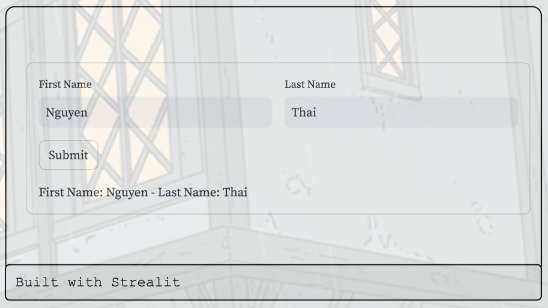

In [19]:
# a)
col1 , col2 = st.columns (2)
f_name = col1.text_input('First Name')
l_name = col2.text_input('Last Name')

# b)
with st.form("my_form"):
    col1 , col2 = st.columns(2)
    f_name = col1.text_input('First Name')
    l_name = col2.text_input('Last Name')

# c)
with st.form("my_form"):
    col1 , col2 = st.columns(2)
    f_name = col1.text_input('First Name')
    l_name = col2.text_input('Last Name')
    submitted = st.form_submit_button("Submit")

## D) ##
with st.form("my_form"):
    col1 , col2 = st.columns(2)
    f_name = col1.text_input('First Name')
    l_name = col2.text_input('Last Name')
    submitted = st.form_submit_button("Submit")
    if submitted:
        st.write("First Name: ", f_name ," - Last Name:", l_name)

### Câu hỏi 8: Hàm nào sau đây cho phép người dùng tải lên nhiều file.


In [ ]:
## A) ##
uploaded_files = st.file_uploader("Choose files", accept_multiple_files=True)

# b) 
uploaded_files = st.multifile_uploader("Choose files", accept_multiple_files=True)

# c) 
uploaded_files = st.file_uploader("Choose files")

# d) 
uploaded_files = st.multifile_uploader("Choose files")

### Câu hỏi 9: Hàm nào sau đây không được sử dụng để hiển thị code trong streamlit?
a) st.code(...)

b) st.echo(...)

c) st.markdown(...)

__d) st.slider(...)__

### Câu hỏi 10: Dung lượng mặc định tối đa mỗi file được tải lên trong streamlit là bao nhiêu.
a) 100 MB

__b) 200 MB__

c) 300 MB

d) 400 MB